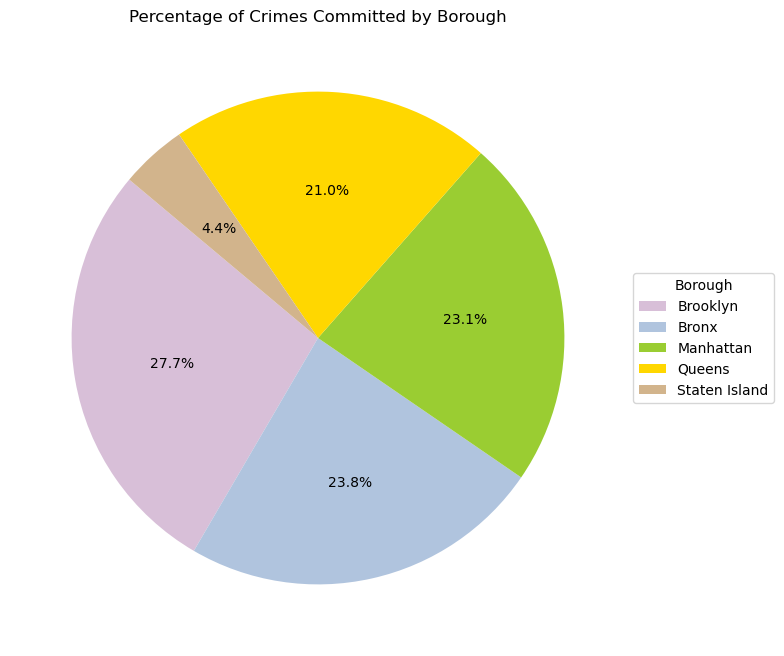

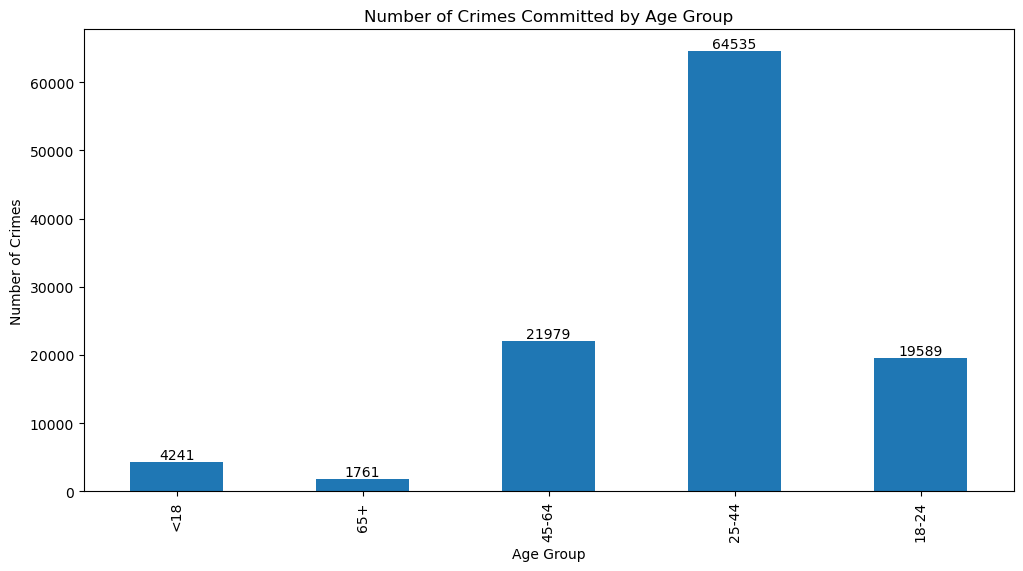

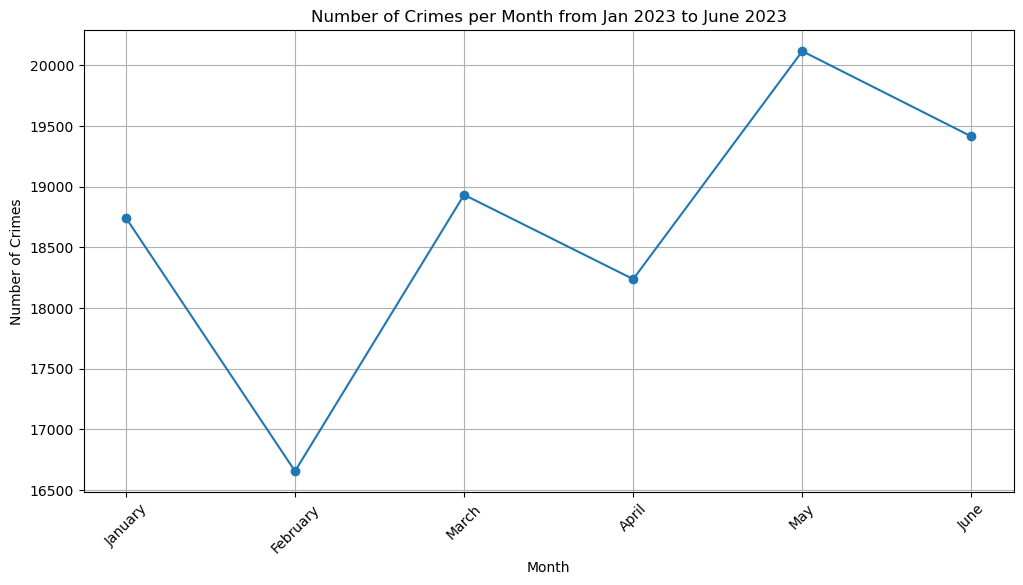

C:\Users\sydne\AppData\Local\Temp\ipykernel_10876\1183390536.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top20 = dfCor[df['OFNS_DESC'].isin(crime_count.index)]


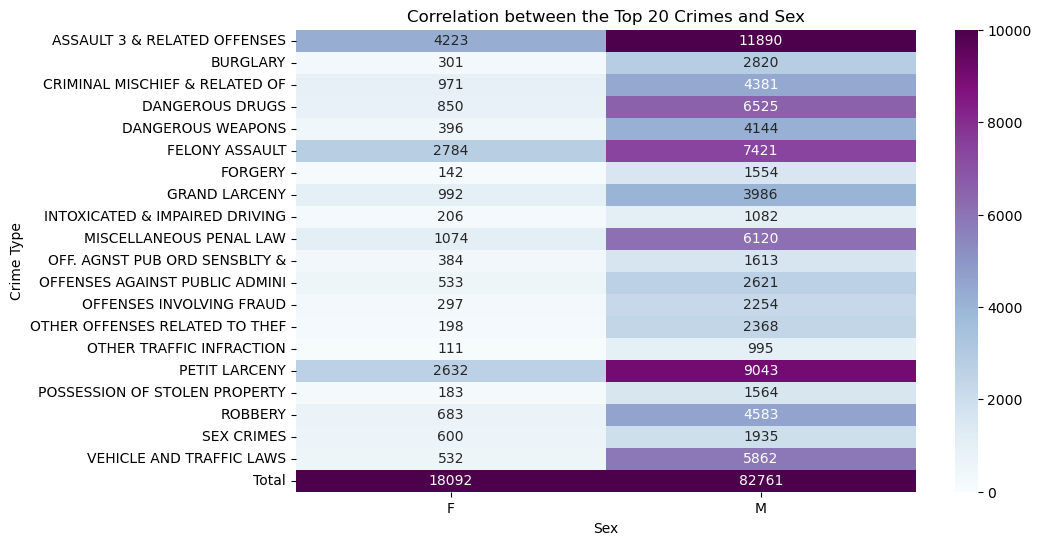

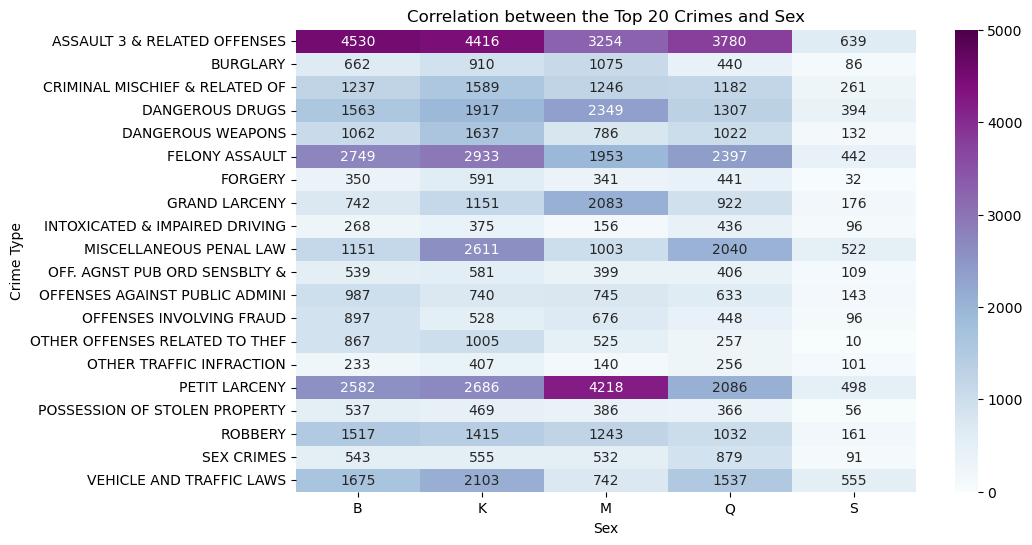

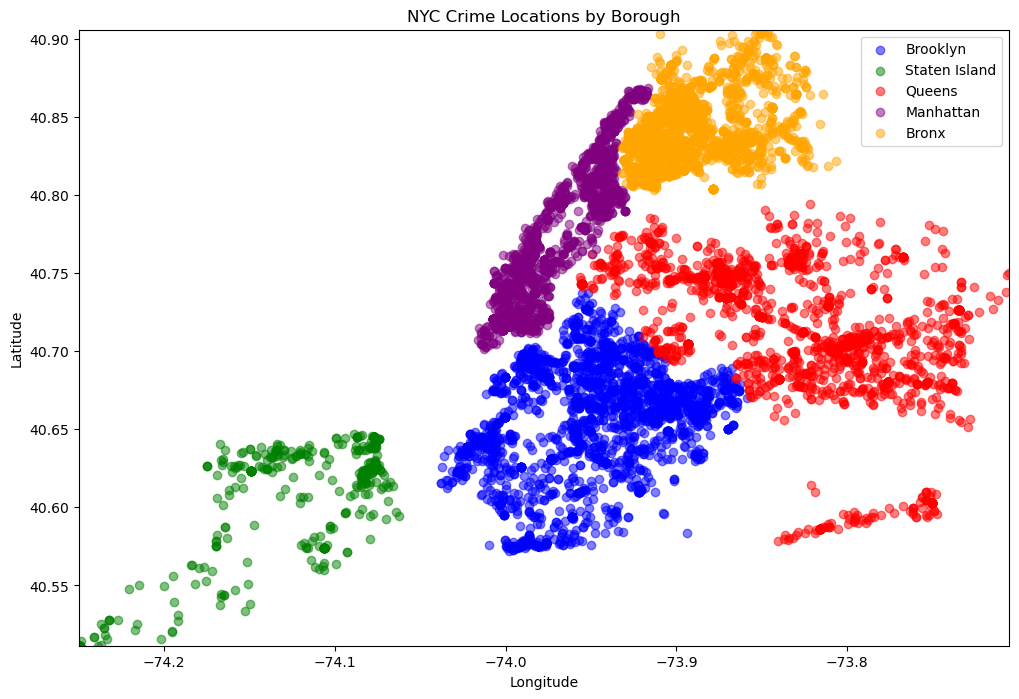

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaneddata.csv')
#Pie Chart of Crimes Committed per Borough
dfBoro = df[(df['ARREST_BORO'] != 'UNKNOWN')]
borough_mapping = {'K': 'Brooklyn', 'S': 'Staten Island', 'Q': 'Queens', 'M': 'Manhattan', 'B': 'Bronx'}
dfBoro['ARREST_BORO'] = df['ARREST_BORO'].map(borough_mapping)
boro_count = dfBoro['ARREST_BORO'].value_counts()
total_count = len(dfBoro)
percent = (boro_count/total_count)*100
colors = ['thistle', 'lightsteelblue', 'yellowgreen', 'gold', 'tan']

# Creating pie chart with legend
plt.figure(figsize=(8, 8))
plt.pie(percent, labels=None, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Percentage of Crimes Committed by Borough')
plt.legend(percent.index, title='Borough', loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

#Bar Graph of Crimes Committed per Age Group
age_count = df['AGE_GROUP'].value_counts().sort_index().iloc[::-1]
# Creating bar graph 
plt.figure(figsize=(12, 6))
plot = age_count.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes Committed by Age Group')
for i, v in enumerate(age_count):
    plot.text(i, v, str(v), ha='center', va='bottom')
plt.show()



#Time series plot for number of crimes committed per month

#Convert date column to datetime type
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], format='%m/%d/%Y')

#Count crime for every month
monthlyCrime = df.groupby(df['ARREST_DATE'].dt.to_period('M')).size()

monthlyCrime.index = monthlyCrime.index.strftime('%B')

plt.figure(figsize=(12, 6))
plt.plot(monthlyCrime.index, monthlyCrime, marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.title('Number of Crimes per Month from Jan 2023 to June 2023')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()




#Heatmap to show correlation between sex and crime type
dfCor = df[(df['PERP_SEX']!= 'U')]
crime_count = dfCor['OFNS_DESC'].value_counts()
#Use only top 20 crimes committed
crime_count = crime_count.head(20)
#Create crosstab
top20 = dfCor[df['OFNS_DESC'].isin(crime_count.index)]
table = pd.crosstab(top20['OFNS_DESC'],top20['PERP_SEX'])
#Row for total crimes for each sex
maleCount = top20['PERP_SEX'].value_counts().values[0]
femaleCount = top20['PERP_SEX'].value_counts().values[1]
table.loc['Total'] = [femaleCount, maleCount]


plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, fmt= 'd', cmap= 'BuPu', vmin=0, vmax=10000)
plt.title('Correlation between the Top 20 Crimes and Sex')
plt.xlabel('Sex')
plt.ylabel('Crime Type')
plt.show()

#Heatmap to show correlation between sex and crime type
dfCor = df[(df['ARREST_BORO']!= 'U')]
crime_count = dfCor['OFNS_DESC'].value_counts()
#Use only top 20 crimes committed
crime_count = crime_count.head(20)
#Create crosstab
top20 = dfCor[df['OFNS_DESC'].isin(crime_count.index)]
table = pd.crosstab(top20['OFNS_DESC'],top20['ARREST_BORO'])
#Row for total crimes for each sex
plt.figure(figsize=(10,6))
sns.heatmap(table, annot=True, fmt= 'd', cmap= 'BuPu', vmin=0, vmax=5000)
plt.title('Correlation between the Top 20 Crimes and Sex')
plt.xlabel('Sex')
plt.ylabel('Crime Type')
plt.show()









# Scatter plot to identify crime density
# Filter out crimes with missing coordinates
dfScatter = df[(df['Latitude'] != 0) & (df['Latitude'] != 0)] 
dfScatter = dfScatter.sample(10000)
# Map Borough labels to full names
borough_mapping = {'K': 'Brooklyn', 'S': 'Staten Island', 'Q': 'Queens', 'M': 'Manhattan', 'B': 'Bronx'}
dfScatter['Borough'] = dfScatter['ARREST_BORO'].map(borough_mapping)


plt.figure(figsize=(12, 8))

# Define color mapping for boroughs
borough_colors = {'Brooklyn': 'blue', 'Staten Island': 'green', 'Queens': 'red', 'Manhattan': 'purple', 'Bronx': 'orange'}

# Scatter plot
for borough, color in borough_colors.items():
    borough_data = dfScatter[dfScatter['Borough'] == borough]
    plt.scatter(borough_data['Longitude'], borough_data['Latitude'], label=borough, color=color, alpha=0.5)

# Set axis labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('NYC Crime Locations by Borough')

# Set axis limits for NYC
plt.xlim(dfScatter['Longitude'].min(), dfScatter['Longitude'].max())
plt.ylim(dfScatter['Latitude'].min(), dfScatter['Latitude'].max())

# Add a legend
plt.legend()

# Show the plot
plt.show()